<h1>Definition</h1>

<p>

As the name suggests this algorithm is applicable for Regression problems. Linear Regression is a Linear Model. Which means, we will establish a linear relationship between the input variable (X) and single output variable (Y). When the input (X) is a single variable this model is called Simple Linear Regression and when there are mutiple input variables (X), it is called Multiple Linear Regression.</p>


<h1>Model Representation</h1>

<p>In this problem we have an input variable X and one output variable Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable and the output variable is called Dependent Variable. We can define this linear relationship as follows:

<h3>Y = β0 + β1.X</h3>  

<h5>β1 = scale factor or coefficient.<br>

β0 = bias coefficient.</h5> <br>



This equation is similar to the line equation y = mx + b with m = β1(Slope) and b = β0(Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.</p>



<h3>Y = mx + b</h3>  

<h5>
m = β1 (slope)<br>

b = β0 (intercept)</h5>


<p>But how do we find these coefficients? That’s the learning procedure. We can find these using different approaches. One is called Ordinary Least Square Method and other one is called Gradient Descent Approach. We will use Ordinary Least Square Method in Simple Linear Regression and Gradient Descent Approach in Multiple Linear Regression in post.</p>

<h2>Ordinary Least Square Method</h2>

<p>Earlier in this post we discussed that we are going to approximate the relationship between X and Y to a line. Let’s say we have few inputs and outputs. And we plot these scatter points in 2D space, we will get something like the following image.</p>


<img src="image1.png">


<p>And you can see a line in the image. That’s what we are going to accomplish. And we want to minimize the error of our model. A good model will always have least error. We can find this line by reducing the error. The error of each point is the distance between line and that point. This is illustrated as follows.</p>

<img src="image2.png">

<p>And total error of this model is the sum of all errors of each point. ie.</p>

<img src="image3.png">

<p>
di - Distance between line and i-th point. <br>
m - Total Numbers of points
    


We are squaring each of the distances. This is because, some points will be above the line and some points will be below the line. We can minimize the error in the model by minimizing D. And after the mathematics of minimizing D, we will get,</p>

<img src="image4.png">

<p>In these equations (x bar) is the mean value of input variable X and (y bar) is the mean value of output variable Y.


Now we have the model. This method is called Ordinary Least Square Method. Now we will implement this model in Python.</p>


<img src="image5.png">

<h1>Implementation</h1>

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
#Reading Data

data = pd.read_csv("headbrain.csv")

In [4]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
print(data.shape)

(237, 4)


<p>There are 237 values in the training set. We will find a linear relationship between Head Size and Brain Weights. So, now we will get these variables.</p>

In [6]:
# Collecting X and Y from Data

X = data["Head Size(cm^3)"].values

Y = data['Brain Weight(grams)'].values

<h5>To find the values β 1 and β 0 , we will need mean of X and Y. We will find these and the coeffients.</h5>

In [7]:

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)


# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

b1 = numer / denom
b0 = mean_y - (b1 * mean_x)


# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


<p> <br>   
    
There we have our coefficients.

Brain Weight = 325.57342104944223 + 0.26342933948939945 * HeadSize

That is our linear model.

Now we will see this graphically</p>

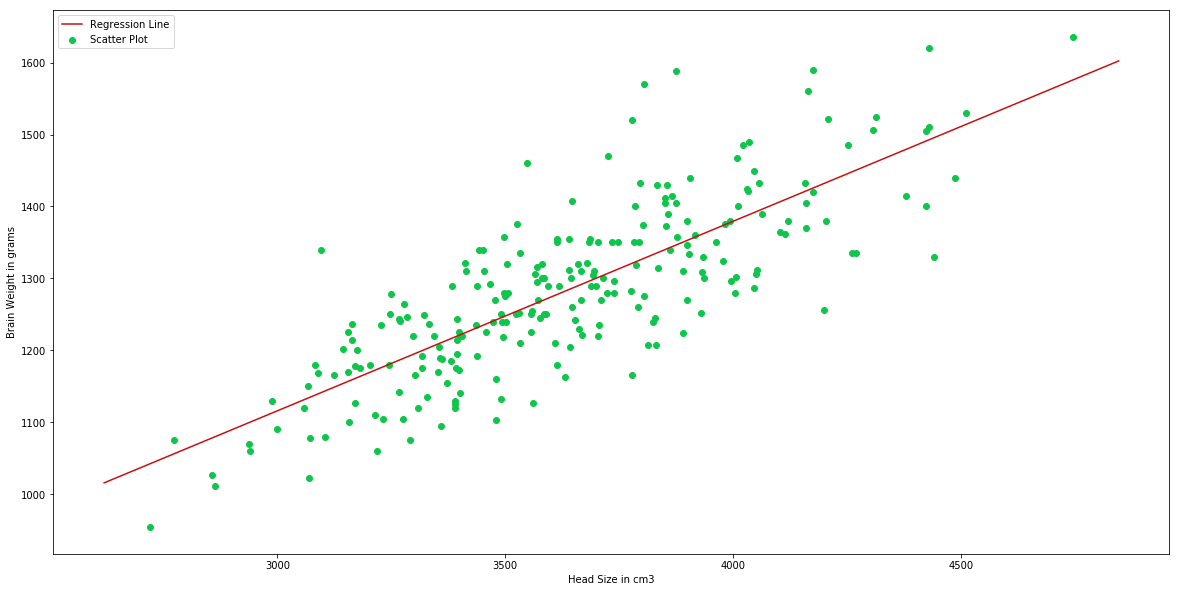

In [8]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100


# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x


# Ploting Line
plt.plot(x, y, color='#c90e0e', label='Regression Line')


# Ploting Scatter Points
plt.scatter(X, Y, c='#0fc64c', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

<p>This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use <b>Root Mean Squared Error</b> and <b>Coefficient of Determination (R square) </b> Score.
    

<b>Root Mean Squared Error</b> is the square root of sum of all errors divided by number of values, or Mathematically,<p/>

<img src="image6.png">

In [9]:
# Calculating Root Mean Squares Error

rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)

print(rmse)

72.1206213783709


 <p><br>
    
  Now we will find R^2  score. R^2 is defined as follows,</p>

<img src="image7.png">

<p>SSt is the total sum of squares and SSr is the total sum of squares of residuals.

R^2 Score usually range from <b>0 to 1</b>. It will also become negative if the model is completely wrong. Now we will find R^2

Score.</p>

In [10]:
ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
    
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


<h5>0.63 is not so bad. Now we have implemented Simple Linear Regression Model using Ordinary Least Square Method. </h5>

<h1>The scikit-learn approach</h1>

<p>Scikit-Learn is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn. Let’s see how we can build this Simple Linear Regression Model using scikit-learn.</p>

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))


# Creating Model
reg = LinearRegression()


# Fitting training data
reg = reg.fit(X, Y)


# Y Prediction
Y_pred = reg.predict(X)


# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)


print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


<p>This exactly equal to model we built from scratch, but simpler and less code.</p>

<h1>Credit:</h1>

https://mubaris.com/posts/linear-regression <br>
https://stackabuse.com/linear-regression-in-python-with-scikit-learn <br>
https://www.coursera.org/learn/machine-learning